In [1]:
# Import the libraries we'll use below.
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style
import plotly.graph_objs as plotly  # for interactive plots

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

In [2]:
# create test and train sets
all_data = pd.read_json("train.json")
outcomes = all_data["requester_received_pizza"]
features = all_data.drop("requester_received_pizza", axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, outcomes, test_size=0.1, random_state=6)

X_train.columns

Index(['giver_username_if_known',
       'number_of_downvotes_of_request_at_retrieval',
       'number_of_upvotes_of_request_at_retrieval', 'post_was_edited',
       'request_id', 'request_number_of_comments_at_retrieval', 'request_text',
       'request_text_edit_aware', 'request_title',
       'requester_account_age_in_days_at_request',
       'requester_account_age_in_days_at_retrieval',
       'requester_days_since_first_post_on_raop_at_request',
       'requester_days_since_first_post_on_raop_at_retrieval',
       'requester_number_of_comments_at_request',
       'requester_number_of_comments_at_retrieval',
       'requester_number_of_comments_in_raop_at_request',
       'requester_number_of_comments_in_raop_at_retrieval',
       'requester_number_of_posts_at_request',
       'requester_number_of_posts_at_retrieval',
       'requester_number_of_posts_on_raop_at_request',
       'requester_number_of_posts_on_raop_at_retrieval',
       'requester_number_of_subreddits_at_request',
  

In [3]:
# create a train/test set with only numeric fields
numeric_columns = ["number_of_downvotes_of_request_at_retrieval",
                   "number_of_upvotes_of_request_at_retrieval",
                   "post_was_edited",
                   "request_number_of_comments_at_retrieval",
                   "requester_account_age_in_days_at_request",
                   "requester_days_since_first_post_on_raop_at_request",
                   "requester_number_of_comments_at_request",
                   "requester_number_of_comments_in_raop_at_request",
                   "requester_number_of_posts_at_request",
                   "requester_number_of_subreddits_at_request",
                   "requester_upvotes_minus_downvotes_at_request",
                   "requester_upvotes_plus_downvotes_at_request"
]

In [4]:
X_train_numeric_only = X_train[numeric_columns]
X_test_numeric_only = X_test[numeric_columns]

In [5]:
number_of_features = X_train_numeric_only.shape[1]
model = keras.Sequential()
model.add(keras.layers.Dense(1,activation = 'sigmoid',input_dim = number_of_features))
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(x = X_train_numeric_only, y = y_train, epochs=10, validation_split=0.1)

Epoch 1/10
103/103 [==============================] - 1s 7ms/step - loss: 8949833.0000 - val_loss: 7243928.5000
Epoch 2/10
103/103 [==============================] - 1s 5ms/step - loss: 6723835.5000 - val_loss: 5099570.5000
Epoch 3/10
103/103 [==============================] - 1s 5ms/step - loss: 4437259.0000 - val_loss: 3100084.7500
Epoch 4/10
103/103 [==============================] - 1s 5ms/step - loss: 2213152.0000 - val_loss: 962631.1250
Epoch 5/10
103/103 [==============================] - 1s 5ms/step - loss: 302583.5938 - val_loss: 1616.4344
Epoch 6/10
103/103 [==============================] - 1s 5ms/step - loss: 10792.2930 - val_loss: 2284.6421
Epoch 7/10
103/103 [==============================] - 1s 5ms/step - loss: 16406.9258 - val_loss: 3541.5598
Epoch 8/10
103/103 [==============================] - 1s 5ms/step - loss: 18804.1484 - val_loss: 2995.4026
Epoch 9/10
103/103 [==============================] - 1s 5ms/step - loss: 32591.0977 - val_loss: 24497.8496
Epoch 10/10
103/

In [6]:
y_train_pred_raw = model.predict(X_train_numeric_only)
y_train_pred = y_train_pred_raw > 0.5
y_test_pred_raw = model.predict(X_test_numeric_only)
y_test_pred = y_test_pred_raw > 0.5

13/13 [==============================] - 0s 1ms/step


In [7]:
y_test

2540     True
159     False
279     False
1563    False
1532    False
        ...  
1329    False
3780     True
1475    False
2534     True
1579    False
Name: requester_received_pizza, Length: 404, dtype: bool

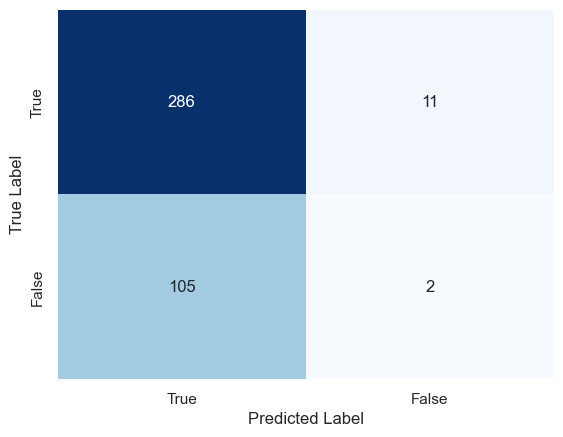

In [8]:
confusion_matrix = tf.math.confusion_matrix(y_test, y_test_pred)
label_names = [True, False]
# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                 xticklabels=label_names, yticklabels=label_names, cbar=False)

# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

In [9]:
print("Train Accuracy:")
train_matches = sum(y_train.values == y_train_pred.flatten())
train_accuracy = train_matches / len(y_train.values)
print(round(train_accuracy, 4))
print("Test Accuracy:")
test_matches = sum(y_test.values == y_test_pred.flatten())
test_accuracy = test_matches / len(y_test.values)
print(round(test_accuracy, 4))

Train Accuracy:
0.725
Test Accuracy:
0.7129
